In [38]:
import cv2
import mediapipe as mp
mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles
mp_holistic = mp.solutions.holistic

# For static images:
IMAGE_FILES = []
BG_COLOR = (192, 192, 192) # gray

# For webcam input:
cap = cv2.VideoCapture(0)
with mp_holistic.Holistic(
    min_detection_confidence=0.5,
    min_tracking_confidence=0.5) as holistic:
  while cap.isOpened():
    success, image = cap.read()
    if not success:
      print("Ignoring empty camera frame.")
      # If loading a video, use 'break' instead of 'continue'.
      continue

    # To improve performance, optionally mark the image as not writeable to
    # pass by reference.
    image.flags.writeable = False
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    results = holistic.process(image)

    print(results )
    break

    # # Draw landmark annotation on the image.
    # image.flags.writeable = True
    # image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
    # mp_drawing.draw_landmarks(
    #     image,
    #     results.face_landmarks,
    #     mp_holistic.FACEMESH_CONTOURS,
    #     landmark_drawing_spec=None,
    #     connection_drawing_spec=mp_drawing_styles
    #     .get_default_face_mesh_contours_style())
    # mp_drawing.draw_landmarks(
    #     image,
    #     results.pose_landmarks,
    #     mp_holistic.POSE_CONNECTIONS,
    #     landmark_drawing_spec=mp_drawing_styles
    #     .get_default_pose_landmarks_style())
    # # Flip the image horizontally for a selfie-view display.
    # cv2.imshow('MediaPipe Holistic', cv2.flip(image, 1))
    # if cv2.waitKey(5) & 0xFF == ord('q'):
    #   break
    
cap.release()
cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>


In [39]:
# ! pip install pandas

In [40]:
import matplotlib.pyplot as plt
import pandas as pd

In [41]:
# plt.imshow(image)

In [42]:
face = pd.DataFrame()
pose = pd.DataFrame()
lefthand = pd.DataFrame()
righthand = pd.DataFrame()

if results.face_landmarks:
    for i, point in enumerate( results.face_landmarks.landmark ):
        face.loc[i , 'x'] = point.x
        face.loc[i , 'y'] = point.y
        face.loc[i , 'z'] = point.z
        # print(i, point)
        
if results.pose_landmarks:
    for i, point in enumerate( results.pose_landmarks.landmark ):
        pose.loc[i , 'x'] = point.x
        pose.loc[i , 'y'] = point.y
        pose.loc[i , 'z'] = point.z
        # print(i, point)
        
if results.left_hand_landmarks:
    for i, point in enumerate( results.left_hand_landmarks.landmark ):
        lefthand.loc[i , 'x'] = point.x
        lefthand.loc[i , 'y'] = point.y
        lefthand.loc[i , 'z'] = point.z
        # print(i, point)
        
if results.right_hand_landmarks:
    for i, point in enumerate( results.right_hand_landmarks.landmark ):
        righthand.loc[i , 'x'] = point.x
        righthand.loc[i , 'y'] = point.y
        righthand.loc[i , 'z'] = point.z
        # print(i, point)
        


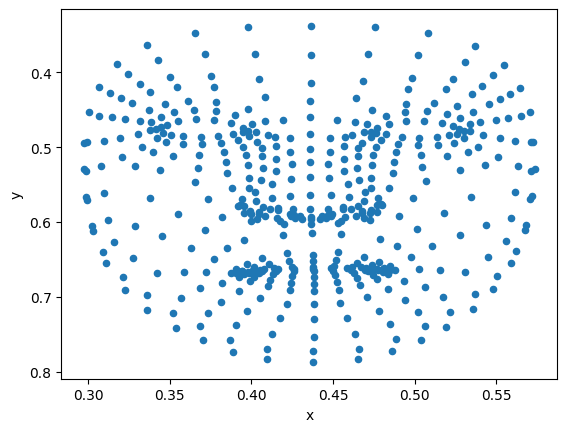

In [43]:
face.plot( x='x', y='y' , kind='scatter')
#  invert y axis while plotting
plt.gca().invert_yaxis()
# Show the plot
plt.show()

In [44]:
face.reset_index().rename( columns={'index':'landmarks_index'})\
    .assign(type='face')
    


,landmarks_index,x,y,z,type
0,0,0.437556,0.643879,-0.039822,face
1,1,0.436217,0.583175,-0.067399,face
2,2,0.436675,0.602224,-0.037254,face
3,3,0.424869,0.522863,-0.047600,face
4,4,0.436046,0.564276,-0.070816,face
...,...,...,...,...,...
463,463,0.468829,0.480147,0.015505,face
464,464,0.461421,0.484251,0.007288,face
465,465,0.457597,0.486700,-0.002025,face
466,466,0.527479,0.475065,0.023703,face


In [45]:
pose.reset_index().rename( columns={'index':'landmarks_index'})\
    .assign(type='pose')
    


,landmarks_index,x,y,z,type
0,0,0.419832,0.575398,-0.841959,pose
1,1,0.448906,0.499430,-0.813016,pose
2,2,0.471715,0.499879,-0.812424,pose
3,3,0.491219,0.501660,-0.812449,pose
4,4,0.385054,0.504798,-0.779226,pose
5,5,0.366116,0.508865,-0.778241,pose
6,6,0.349682,0.512455,-0.778507,pose
7,7,0.534748,0.536191,-0.513785,pose
8,8,0.340966,0.546484,-0.344739,pose
9,9,0.472317,0.640566,-0.725920,pose


In [46]:
lefthand.reset_index().rename( columns={'index':'landmarks_index'})\
    .assign(type='left_hand')
    


,landmarks_index,type


In [47]:
righthand.reset_index().rename( columns={'index':'landmarks_index'})\
    .assign(type='right_hand')
    


,landmarks_index,type


In [48]:
landmarks = pd.concat( [ face, pose, lefthand, righthand ] )\
    .reset_index(drop=True)

In [49]:
landmarks

,x,y,z
0,0.437556,0.643879,-0.039822
1,0.436217,0.583175,-0.067399
2,0.436675,0.602224,-0.037254
3,0.424869,0.522863,-0.047600
4,0.436046,0.564276,-0.070816
...,...,...,...
496,0.395031,3.195353,0.170776
497,0.723853,3.285077,0.333902
498,0.398138,3.306551,0.174493
499,0.649099,3.400670,-0.338947
